In [3]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as pl
from matplotlib import pyplot as plt

In [7]:
img = cv2.imread('beach-438500_1280.jpg',0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])

In [8]:
print(hist)


[[1.2100e+02]
 [7.1000e+01]
 [1.0200e+02]
 [1.2700e+02]
 [2.0000e+02]
 [2.9800e+02]
 [4.4900e+02]
 [5.4800e+02]
 [7.5000e+02]
 [8.5400e+02]
 [1.0480e+03]
 [1.0650e+03]
 [1.2680e+03]
 [1.2560e+03]
 [1.2890e+03]
 [1.4950e+03]
 [1.5010e+03]
 [1.6420e+03]
 [1.8540e+03]
 [1.9560e+03]
 [2.0910e+03]
 [2.3690e+03]
 [2.5540e+03]
 [2.7790e+03]
 [3.1710e+03]
 [3.3350e+03]
 [3.6900e+03]
 [4.1120e+03]
 [4.3580e+03]
 [4.7750e+03]
 [5.1630e+03]
 [5.6630e+03]
 [6.2140e+03]
 [6.6640e+03]
 [6.9730e+03]
 [7.3260e+03]
 [7.6190e+03]
 [7.5070e+03]
 [7.8810e+03]
 [8.0220e+03]
 [8.3600e+03]
 [8.1590e+03]
 [8.1020e+03]
 [7.8800e+03]
 [7.4480e+03]
 [7.3440e+03]
 [7.0200e+03]
 [6.5720e+03]
 [6.3100e+03]
 [5.9620e+03]
 [5.9500e+03]
 [5.6490e+03]
 [5.5190e+03]
 [5.6340e+03]
 [5.9810e+03]
 [6.0460e+03]
 [6.4140e+03]
 [6.3120e+03]
 [6.4570e+03]
 [6.6120e+03]
 [6.8840e+03]
 [7.0870e+03]
 [7.6350e+03]
 [7.7900e+03]
 [8.0480e+03]
 [7.9570e+03]
 [7.9710e+03]
 [8.2250e+03]
 [8.4090e+03]
 [8.6010e+03]
 [8.9320e+03]
 [9.40

In [9]:
hist,bins = np.histogram(img.ravel(),256,[0,256])

In [10]:
print(hist)

[  121    71   102   127   200   298   449   548   750   854  1048  1065
  1268  1256  1289  1495  1501  1642  1854  1956  2091  2369  2554  2779
  3171  3335  3690  4112  4358  4775  5163  5663  6214  6664  6973  7326
  7619  7507  7881  8022  8360  8159  8102  7880  7448  7344  7020  6572
  6310  5962  5950  5649  5519  5634  5981  6046  6414  6312  6457  6612
  6884  7087  7635  7790  8048  7957  7971  8225  8409  8601  8932  9408
  9920 10963 11302 11996 11874 11606 11567 11602 11657 11243 11335 10944
 10637 10502 10368 10369 10346 10151  9821  9750  9597  9238  9091  8667
  8679  9211  9387  9331  8926  8808  8609  8580  8344  7904  7851  8246
  8055  8280  8581  8496  8164  7847  7587  7392  7234  7102  7118  7259
  6986  6772  6743  6673  6367  5898  5610  5272  5168  4860  4758  4464
  4418  4236  4206  4212  4048  3981  3906  3770  3653  3617  3516  3478
  3560  3448  3327  3357  3390  3280  3177  3201  3183  2956  2874  2943
  2894  2815  2839  2632  2492  2254  2178  2093  2

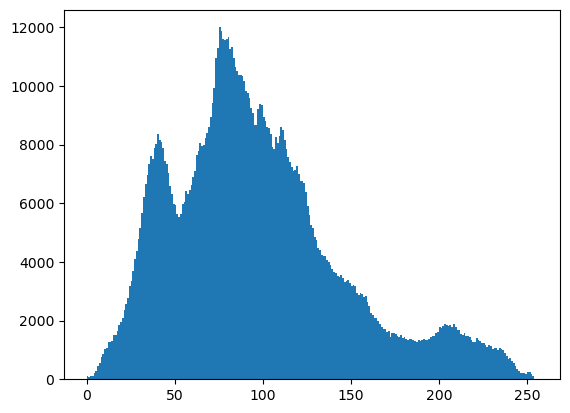

In [15]:
img = cv2.imread('beach-438500_1280.jpg',0)
plt.hist(img.ravel(),256,[0,256]); plt.show()

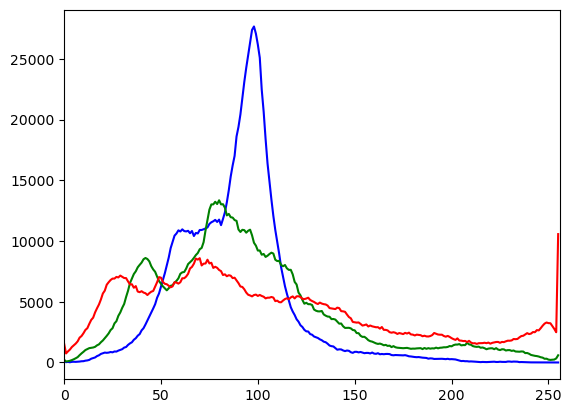

In [22]:
img = cv2.imread('beach-438500_1280.jpg')

color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()


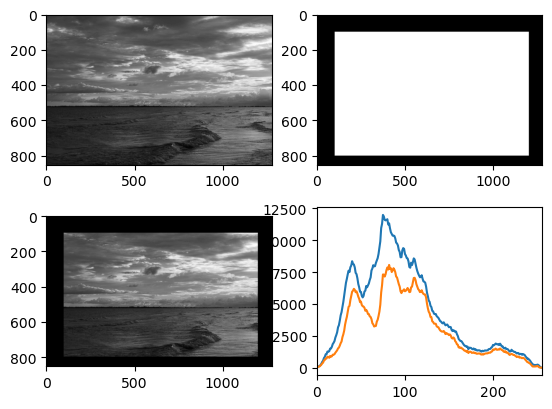

In [32]:
img = cv2.imread('beach-438500_1280.jpg',0)

# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:800, 100:1200] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)

# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()


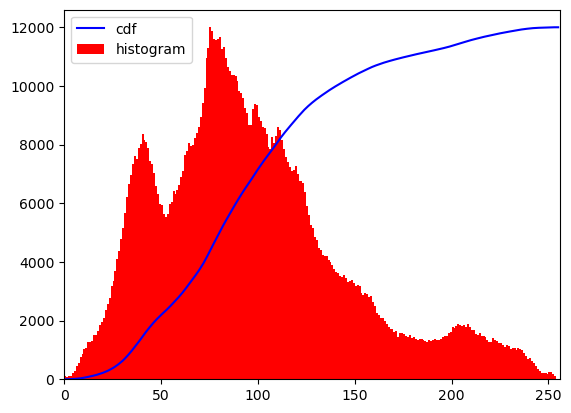

In [66]:
img = cv2.imread('beach-438500_1280.jpg',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()


In [67]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [68]:
img2 = cdf[img]

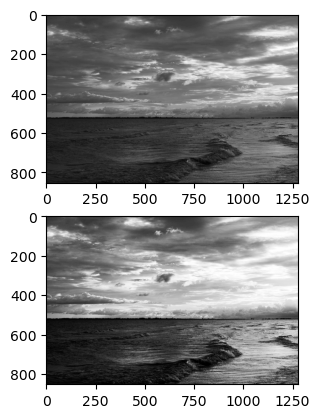

In [69]:
plt.subplot(211), plt.imshow(img,"gray")
plt.subplot(212), plt.imshow(img2,"gray")
plt.show()